<a href="https://colab.research.google.com/github/le-beda/Coursework2023/blob/main/find_plateau_threshold_for_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подбор порога остановы на плато

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/simulations_tables

Mounted at /content/drive/
/content/drive/MyDrive/simulations_tables


## Чтение данных

In [3]:
def read_csv_file(directory_path, name):
  file_path = os.path.join(directory_path, name + ".csv")
  # print("read file ", file_path)
  return pd.read_csv(file_path)

In [4]:
def read_description(directory_path, file_name = "description.txt", parse_params = False):
  file_path = os.path.join(directory_path, file_name)
  # print("read description from file  ", file_path)
  with open(file_path, 'r') as file:
    if not parse_params:
      return file.read()
    result = {}
    for line in file:
      name, value = line.split('=')
      value = value.strip(' \t\n\r')
      if value == 'TRUE':
        value = True
      elif value == 'FALSE':
        value = False
      else:
        try:
          value = float(value)
        except:
          try:
            value = int(value)
          except:
            ...
      result[name] = value
    return result

In [5]:
def read_files(directory_path):
  data = {}
  # строковое описание параметров
  data["description_str"] = read_description(directory_path)
  # описание параметров в виде словаря
  data["params"] =  read_description(directory_path, parse_params = True)
  # численность популяции
  data["population"] = read_csv_file(directory_path, "population")
  data["population"].drop(data["population"].tail(1).index, inplace=True)
  data["population"].rename(columns={"Unnamed: 0": 'epochs'}, inplace=True)
  # результаты последовательных сглаживаний численности популяции
  name = "exp_pop5"
  data[name] = read_csv_file(directory_path, name)
  data[name].rename(columns={"Unnamed: 0": 'epochs'}, inplace=True)
  return data

In [6]:
# читаем все результаты симуляций из папок 
def read_all_simulations(directories_paths):
  data = []
  for directory_path in directories_paths:
    for simulation_diractory_name in os.listdir(directory_path):
      # print(simulation_diractory_name)
      simulation_diractory_path = os.path.join(directory_path, simulation_diractory_name)
      if os.path.isdir(simulation_diractory_path):
        result = read_files(simulation_diractory_path)
        # только симуляции без поиска плато, но достаточно длинные чтобы выйти на него
        # print(simulation_diractory_name)
        if not result["params"]['auto_stop_at_plateau'] and len(result["population"]) > 140:
          print(len(result["population"]))
          data.append(result)
  return data

## Построение графиков

In [7]:
def print_all_in_one_frame(Data, x="time", y = "population", limit = 140):
  limit = min(limit, len(Data[0][y]))
  if y== "exp_pop":
    type_d = "exp_pop"
  if 'exp' in y and y!="exp_pop":
    type_d = "exp_pop2"
  else:
    type_d = "pop"
  fig = plt.figure(figsize=(40, 5), dpi=80)
  plt.axis('off')
  plt.title("Simulations" )
  #fig.tight_layout(pad=6.0,  h_pad=3, w_pad=3)
  fig.patch.set_visible(False)
  axes = fig.subplots(nrows=1, ncols=1)
  for i, data_ in enumerate(Data):
    axes.plot(data_[y][x][:limit], data_[y][type_d][:limit], label="#"+str(i))
    axes.set_xlabel(x)
    axes.set_ylabel(y)
  axes.legend(loc="lower right")


## Работа с симуляциями


In [8]:
directories = list(set([
                "/content/drive/MyDrive/simulations_tables/find_plateau_threshold_big_competition",
               ]))
data = read_all_simulations(directories)

213
150
151
199
303
182
161
182
367
271
232
291
238
353
325
300
379
318
262
260
267
284
221


In [9]:
data[0]['exp_pop5']

,epochs,time,exp_pop2
0,1,0.000000,1.00000
1,2,1.585765,1.01000
2,3,4.637034,1.02800
3,4,5.117641,1.07230
4,5,5.486046,1.17746
...,...,...,...
546,547,112.901833,37.00000
547,548,112.901833,37.00000
548,549,112.901833,37.00000
549,550,112.901833,37.00000


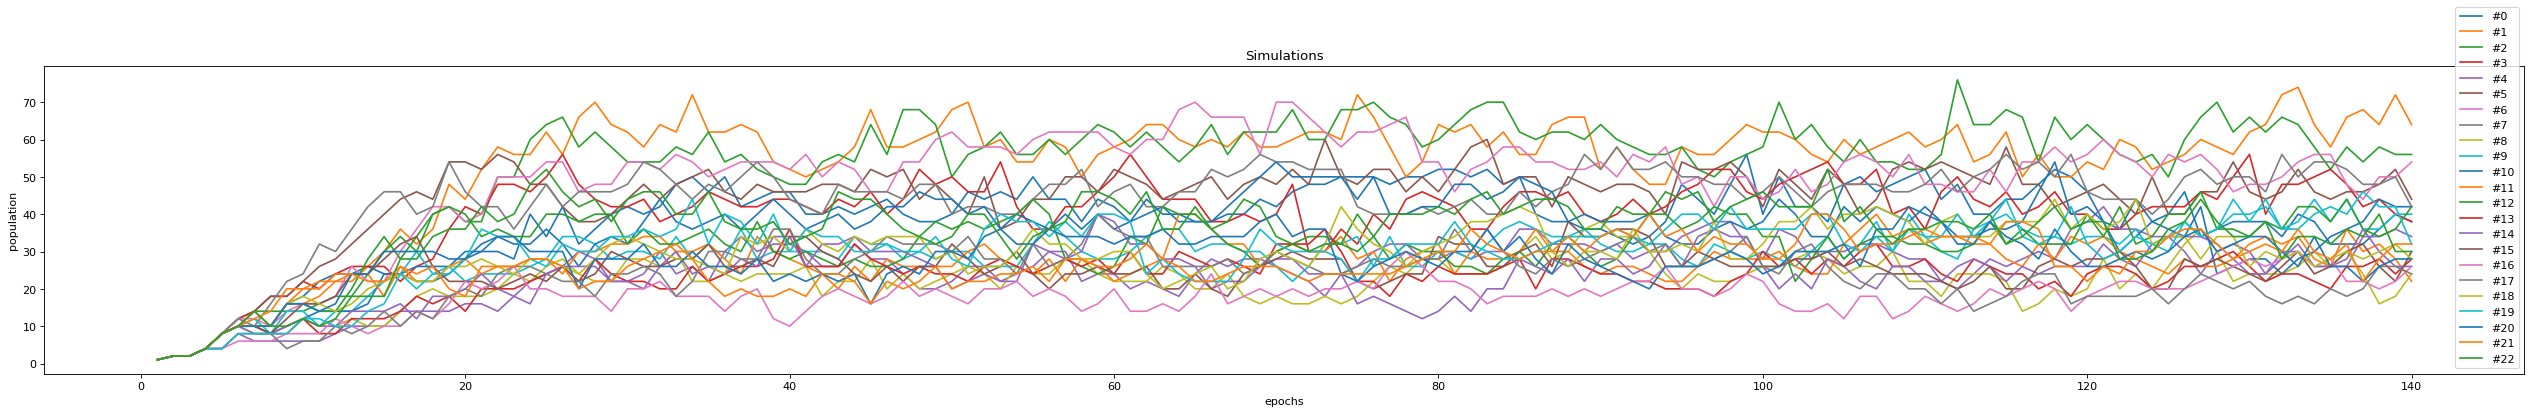

In [10]:
# построим все графики
print_all_in_one_frame(data ,x = "epochs", y = "population", limit = 140)

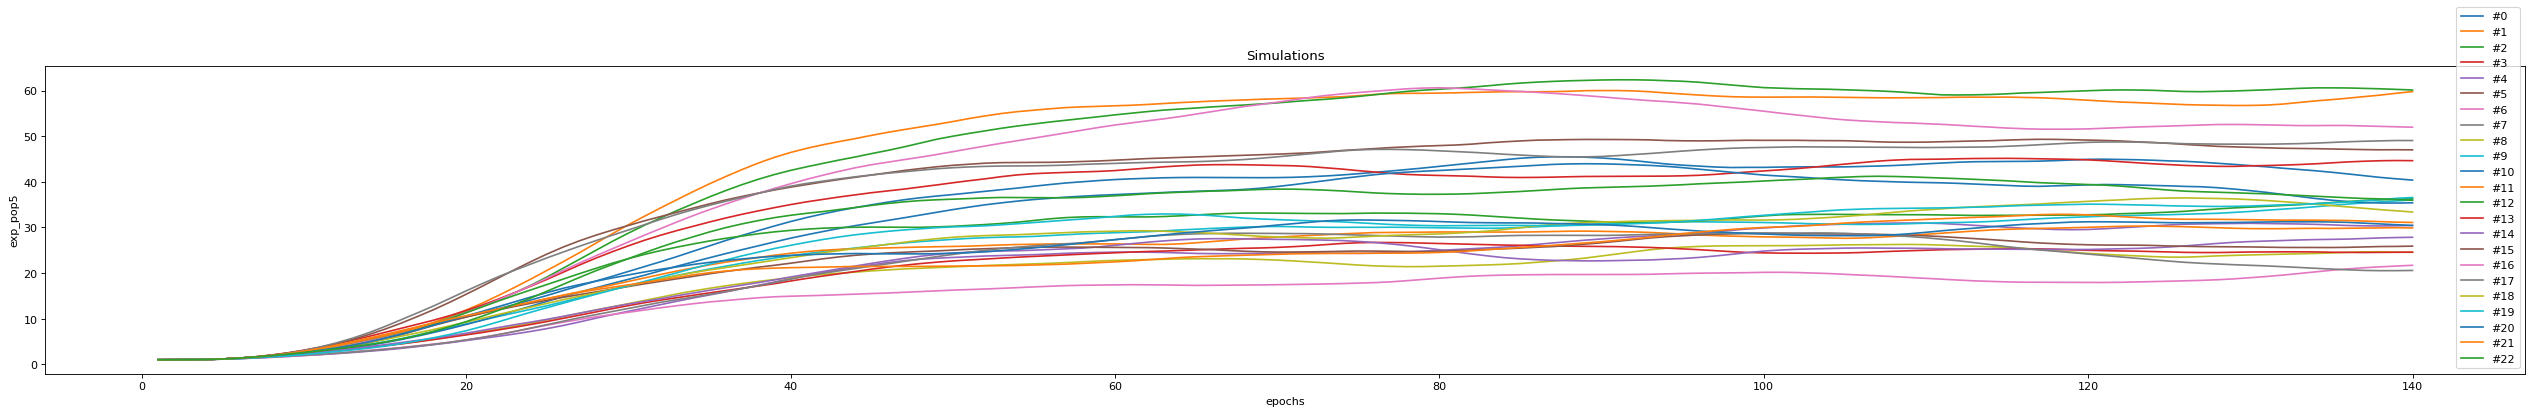

In [11]:
# построим все графики после 5 экспоненциального сглаживания
print_all_in_one_frame(data ,x = "epochs", y = "exp_pop5", limit = 140)

## Подбор окна сглаживания

     epochs        time  exp_pop2
0         1    0.000000   1.00000
1         2    1.585765   1.01000
2         3    4.648534   1.02800
3         4    5.130704   1.07230
4         5    5.509743   1.17746
..      ...         ...       ...
518     519  105.392688  45.00000
519     520  105.392688  45.00000
520     521  105.392688  45.00000
521     522  105.392688  45.00000
522     523  105.392688  45.00000

[523 rows x 3 columns]


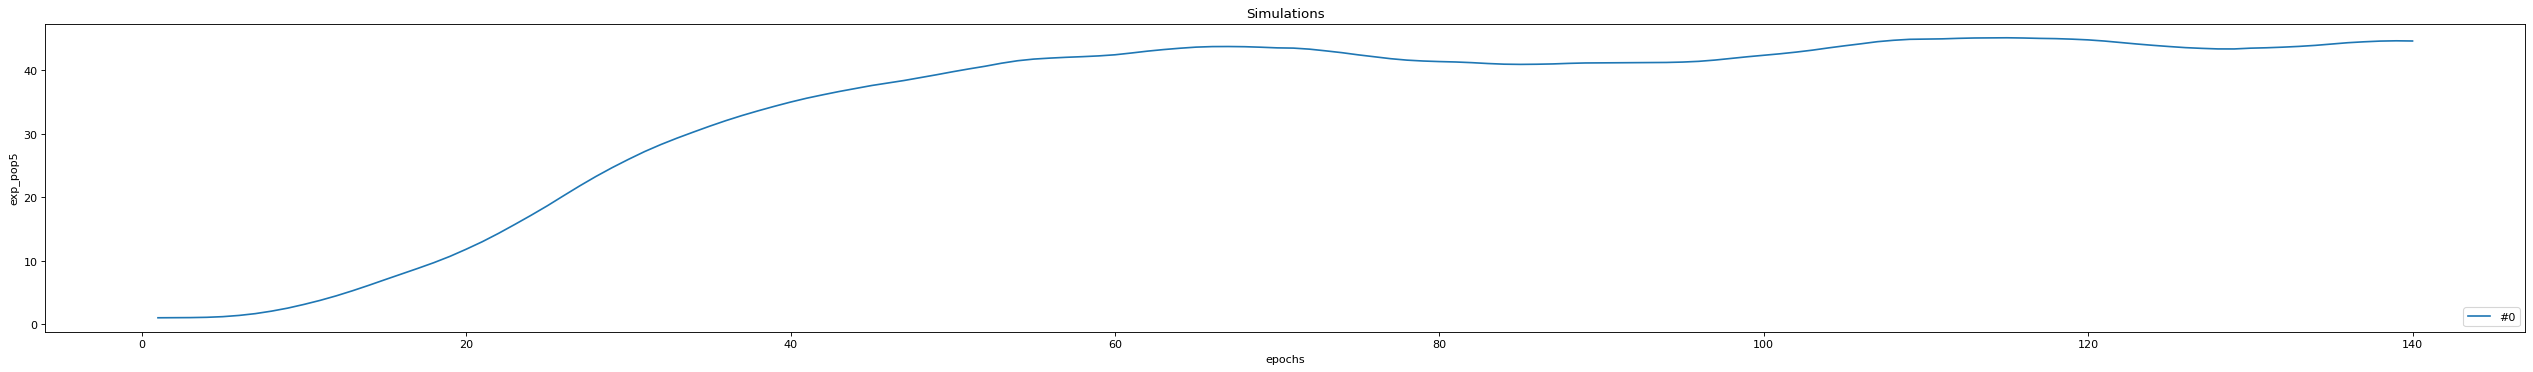

[0.004208435615999997, 0.3833329635981029, 1.3426985113268823, 1.909401019968994, 4.003729236099818, 4.124427493522235, 1.9813289374960994, 1.0755550441989172, 0.4971650191785667, 0.39528568645997997, 0.3169774787992802, 0.03231560462379061, 0.10886772053355484, 0.006325187306468522, 0.1460696113697825, 0.07470768594648867, 0.020702092937186, 0.007199773167800756, 0.0016266083747273545, 0.11715646602941461, 0.20510361614525952, 0.07499208992322812, 0.0037673352585077995, 0.010595568868731729, 0.0951636317960601, 0.006044667583796249, 0.043354042749106016, 0.012400659628799254, 0.059166608904288244, 0.06302745012154068, 0.006706695159914083, 0.021595626183608125, 0.08751897205509104, 0.16236950312581455, 0.049592685914206534, 0.2444950502855384, 0.21006423275079905, 0.07526917377686167, 0.0025020732401374386, 0.008058135171110816, 0.0003922616147128016, 0.00018604959547382192, 0.0005061376705382045, 0.0004782084422928896, 0.0003235062047154219, 0.00018543773073595687, 9.625381950629703e

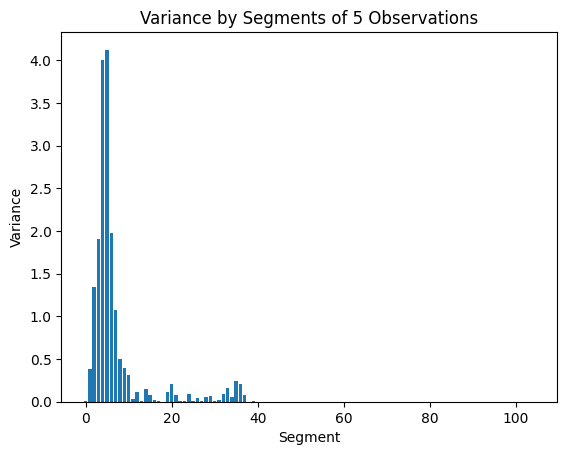

[3.852841804418433, 33.49862794674606, 10.366558006996156, 2.1338526674097538, 0.16180207497109167, 0.11293616357834078, 0.788456472565186, 0.06188348874773413, 0.13288752244624952, 0.341899245202427, 0.23091169608627102, 0.5595227728930923, 0.7350775359206544, 0.010736898436290507, 0.004214176912858729, 0.0009437432626099529, 9.825415881565618e-05, 7.728598523946504e-06, 5.25073382605888e-07, 3.2595034401537e-08, 1.9032810957630163e-09, 1.0632473104991288e-10, 5.744041601996076e-12, 3.0227672985378196e-13, 1.5574811770159265e-14, 7.886856318471527e-16, 3.9362227410478234e-17, 1.9404209139839788e-18, 9.465410374477832e-20, 4.573782392106149e-21, 2.1933812062772442e-22, 1.043526914878466e-23, 4.771872206408915e-25, 2.576524897905854e-26, 2.3495918653967368e-27]
35


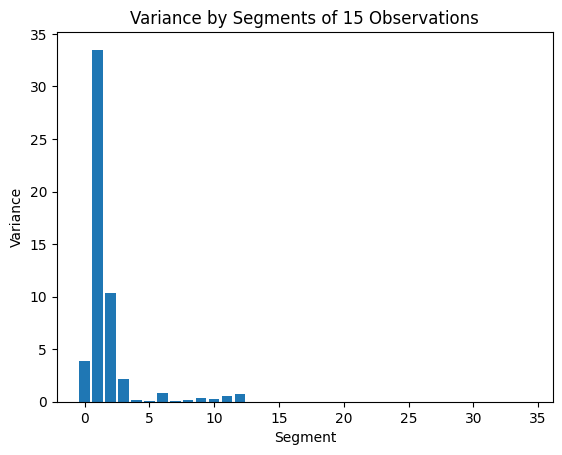

[169.87829243602593, 2.0569191427942983, 1.642052141592242, 2.4780945704424195, 0.2991745899380933, 0.0016768308647001292, 7.43162756213648e-07, 1.425409841243662e-10, 2.0378742952363498e-14, 2.504222521575807e-18, 2.8044635315685964e-22, 3.216028138405021e-26]
12


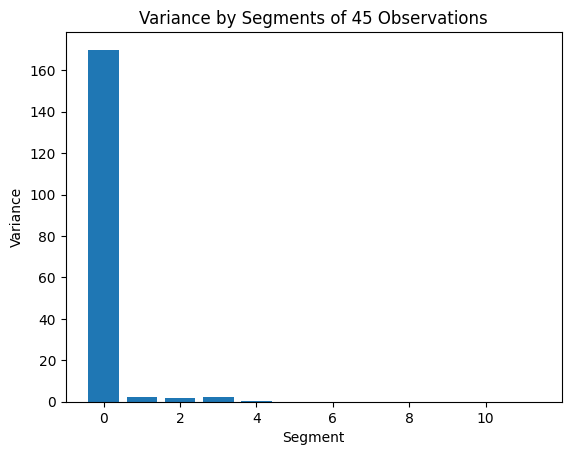

[234.42201462325386, 2.5312894358376923, 0.19289298863165824, 5.255896678318522e-07, 1.404463660193181e-14, 2.2113347442786834e-22]
6


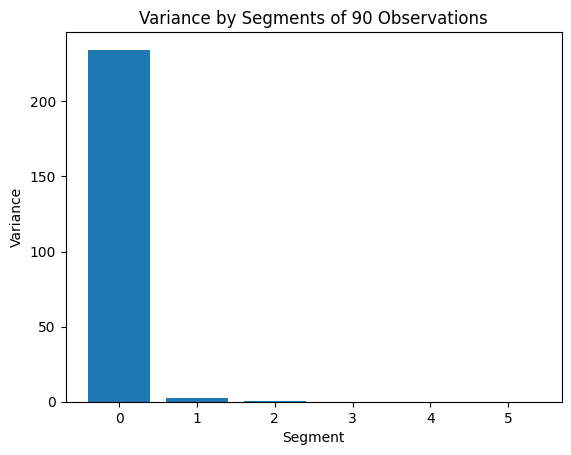

In [63]:
# пример для одной из симуляций
n = 3
print(data[n]["exp_pop5"])
print_all_in_one_frame([data[n]], x="epochs", y = "exp_pop5", limit = 140)
plt.show()
for size in [5, 15, 45, 90]:
  data_ = data[n]["exp_pop5"]["exp_pop2"]
  data_segments = [data_[i:i+size] for i in range(0, len(data_), size)]
  variances = [np.var(segment) for segment in data_segments]
  print(variances)
  print(len(variances))
  plt.bar(range(0, len(variances)), variances)
  # Добавляем заголовок и метки осей
  plt.title('Variance by Segments of ' + str(size) + ' Observations')
  plt.xlabel('Segment')
  plt.ylabel('Variance')
  plt.show()


## Подбор порога

In [64]:
for n in range(len(data)):
  print(len(data[n]["exp_pop5"]))

551
482
479
523
634
526
495
522
711
604
569
631
572
699
656
636
714
655
592
605
611
632
557


In [66]:
max_arr = []
sec_mx_arr = []
for n in range(len(data)):
  for size in [45, 90]:
    data_ = data[n]["exp_pop5"]["exp_pop2"][:450]
    data_segments = [data_[i:i+size] for i in range(0, len(data_), size)]
    variances = [np.var(segment) or  0.00000001 for segment in data_segments]
    mx = -1
    sec_mx = -1
    for i in range(len(variances)-2):
      if (mx < variances[i]/variances[i+1] or mx < 1/(variances[i]/variances[i+1])):
        sec_mx = mx
      mx = max(variances[i]/variances[i+1], mx)
      # для убывающих графиков
      mx = max(1/(variances[i]/variances[i+1]), mx)
    max_arr.append(mx)
    if sec_mx!=-1:
      sec_mx_arr.append(sec_mx)

In [67]:
print(max_arr)
print(sec_mx_arr)

[6766.397911725114, 23210.72137274336, 8325.250427103541, 18038010.619156472, 8421.26963475965, 20906098.369063925, 6994.591592698533, 367003.00716978515, 928.0122647100764, 82.68388925598211, 7632.884434931031, 2464360.929781599, 8148.292576169951, 13092900.133601326, 7541.179015786053, 1425135.4773436128, 86.05913280553834, 84.26951502213555, 4719.63843274491, 22.569622203078715, 6009.807054704182, 658.7041167475318, 2176.9488448428006, 197.50434724902283, 5773.31540586033, 91.29129436137823, 23.03172972851697, 59.572065196808346, 289.74100725068354, 55.722638898556795, 971.2129588039481, 84.48927803010282, 21.282366197598588, 19.422803894270324, 100.96113239038917, 13.142954363217275, 4194.737371887439, 285.4616087500298, 4739.312826692729, 63.17865653337587, 4328.136149729786, 125.5992512446228, 3218.179950925237, 46.95790374730534, 6396.712410511928, 1570.0173156622495]
[4842.293850153972, 88.31724098342279, 7272.77182606848, 800.7124986447618, 7413.687056358507, 214.4351503315833

In [68]:
pd.DataFrame(max_arr).describe()

,0
count,4.600000e+01
mean,1.226478e+06
std,4.404299e+06
min,1.314295e+01
25%,8.488174e+01
50%,1.873483e+03
75%,7.404532e+03
max,2.090610e+07


In [69]:
pd.DataFrame(sec_mx_arr).describe()

,0
count,33.000000
mean,1887.561471
std,2583.009630
min,17.165119
25%,45.822928
50%,255.502213
75%,3584.771054
max,7413.687056


In [18]:
pd.DataFrame(max_arr).median()

0    115.911026
dtype: float64

In [19]:
pd.DataFrame(sec_mx_arr).median()

0    42.90345
dtype: float64